In [1]:
# Instalando as bibliotecas necessárias
! pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq

# Carregando os dados
df = pd.read_parquet('spotify_songs.parquet')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Exibindo as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head().to_string(index=False))

Primeiras linhas do DataFrame:
                                           track_name     track_artist  track_popularity         track_album_id                                      track_album_name track_album_release_date playlist_name            playlist_id playlist_genre playlist_subgenre  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  duration_ms
I Don't Care (with Justin Bieber) - Loud Luxury Remix       Ed Sheeran                66 2oCs0DGTsRO98Gh5ZSl2Cx I Don't Care (with Justin Bieber) [Loud Luxury Remix]               2019-06-14     Pop Remix 37i9dQZF1DXcZDD7cfEKhW            pop         dance pop         0.748   0.916    6    -2.634     1       0.0583        0.1020          0.000000    0.0653    0.518 122.036       194754
                      Memories - Dillon Francis Remix         Maroon 5                67 63rPSO264uRjW1X5E6cWv6                       Memories (Dillon Francis Remix)               2019-12-13 

In [4]:
# Obtendo os nomes das colunas
colunas = df.columns.tolist()
print("\nNomes de todas as colunas:")
print(colunas)


Nomes de todas as colunas:
['track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [5]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe().transpose().to_string())


Estatísticas descritivas:
                    count           mean           std          min          25%            50%           75%         max
track_popularity  32833.0      42.477081     24.984074     0.000000      24.0000      45.000000      62.00000     100.000
danceability      32833.0       0.654850      0.145085     0.000000       0.5630       0.672000       0.76100       0.983
energy            32833.0       0.698619      0.180910     0.000175       0.5810       0.721000       0.84000       1.000
key               32833.0       5.374471      3.611657     0.000000       2.0000       6.000000       9.00000      11.000
loudness          32833.0      -6.719499      2.988436   -46.448000      -8.1710      -6.166000      -4.64500       1.275
mode              32833.0       0.565711      0.495671     0.000000       0.0000       1.000000       1.00000       1.000
speechiness       32833.0       0.107068      0.101314     0.000000       0.0410       0.062500       0.13200       0.9

In [6]:
# Informações gerais sobre o conjunto de dados
print("\nInformações gerais sobre o conjunto de dados:")
info_table = pd.DataFrame({
    'Nome da coluna': df.columns,
    'Tipos de dados': df.dtypes,
    'Valores não nulos': df.notnull().sum(),
    'Valores únicos': df.nunique()
})
print(info_table.to_string(index=False))



Informações gerais sobre o conjunto de dados:
          Nome da coluna Tipos de dados  Valores não nulos  Valores únicos
              track_name         object              32828           23449
            track_artist         object              32828           10692
        track_popularity          int64              32833             101
          track_album_id         object              32833           22545
        track_album_name         object              32828           19743
track_album_release_date         object              32833            4530
           playlist_name         object              32833             449
             playlist_id         object              32833             471
          playlist_genre         object              32833               6
       playlist_subgenre         object              32833              24
            danceability        float64              32833             822
                  energy        float64              

In [7]:
# Verificando valores nulos
print("\nContagem de valores nulos por coluna:")
null_count_table = pd.DataFrame(df.isnull().sum(), columns=['Valores Nulos'])
print(null_count_table.to_string())



Contagem de valores nulos por coluna:
                          Valores Nulos
track_name                            5
track_artist                          5
track_popularity                      0
track_album_id                        0
track_album_name                      5
track_album_release_date              0
playlist_name                         0
playlist_id                           0
playlist_genre                        0
playlist_subgenre                     0
danceability                          0
energy                                0
key                                   0
loudness                              0
mode                                  0
speechiness                           0
acousticness                          0
instrumentalness                      0
liveness                              0
valence                               0
tempo                                 0
duration_ms                           0


In [8]:
# Distribuição da popularidade das faixas
print("\nDistribuição da popularidade das faixas:")
popularity_table = df['track_popularity'].value_counts().reset_index()
popularity_table.columns = ['Popularidade', 'Contagem']
print(popularity_table.to_string(index=False))



Distribuição da popularidade das faixas:
 Popularidade  Contagem
            0      2703
            1       575
           57       541
           54       514
           51       514
           60       514
           52       506
           45       505
           58       503
           50       498
           56       497
           49       497
           47       496
           61       492
           55       492
           40       486
           63       483
           38       483
           44       472
           53       472
           62       470
           67       468
           59       467
           48       465
           43       464
           65       462
           39       459
           69       443
           41       442
           66       441
           37       435
           35       433
           36       431
           46       430
           42       428
           68       425
           64       424
           70       410
           71       40

In [9]:
# Distribuição de gêneros de playlists
print("\nDistribuição de gêneros de playlists:")
genre_table = df['playlist_genre'].value_counts().reset_index()
genre_table.columns = ['Gênero', 'Contagem']
print(genre_table.to_string(index=False))


Distribuição de gêneros de playlists:
Gênero  Contagem
   edm      6043
   rap      5746
   pop      5507
   r&b      5431
 latin      5155
  rock      4951


In [10]:
# Distribuição de subgêneros de playlists
print("\nDistribuição de subgêneros de playlists:")
subgenre_table = df['playlist_subgenre'].value_counts().reset_index()
subgenre_table.columns = ['Subgênero', 'Contagem']
print(subgenre_table.to_string(index=False))



Distribuição de subgêneros de playlists:
                Subgênero  Contagem
progressive electro house      1809
         southern hip hop      1675
          indie poptimism      1672
            latin hip hop      1656
                 neo soul      1637
                  pop edm      1517
            electro house      1511
                hard rock      1485
             gangster rap      1458
               electropop      1408
       urban contemporary      1405
                  hip hop      1322
                dance pop      1298
             classic rock      1296
                     trap      1291
                 tropical      1288
                latin pop      1262
                  hip pop      1256
                 big room      1206
           new jack swing      1133
            post-teen pop      1129
           permanent wave      1105
               album rock      1065
                reggaeton       949


In [11]:

# Exibindo uma amostra aleatória de 10 linhas
print("Amostra aleatória de 10 linhas:")
print(df.sample(10).to_string(index=False))


Amostra aleatória de 10 linhas:
                  track_name           track_artist  track_popularity         track_album_id                  track_album_name track_album_release_date                                               playlist_name            playlist_id playlist_genre playlist_subgenre  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  duration_ms
Drowning (feat. Kodak Black) A Boogie Wit da Hoodie                78 3HHp5I6Q6SEyU5bkvoCtnV                 The Bigger Artist               2017-09-29                                                     Hip pop 1Sc7bobknESH7SXQcnmoX5            r&b           hip pop         0.839   0.810    5    -5.274     0       0.0568       0.50100          0.000000    0.1170    0.814 129.014       209269
              Get to Know Ya                Maxwell                48 3Ul8Nyuzr2AEwE8iSrQepC                               Now               2001-08-14                         

In [12]:
# Calculando a correlação entre as colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()


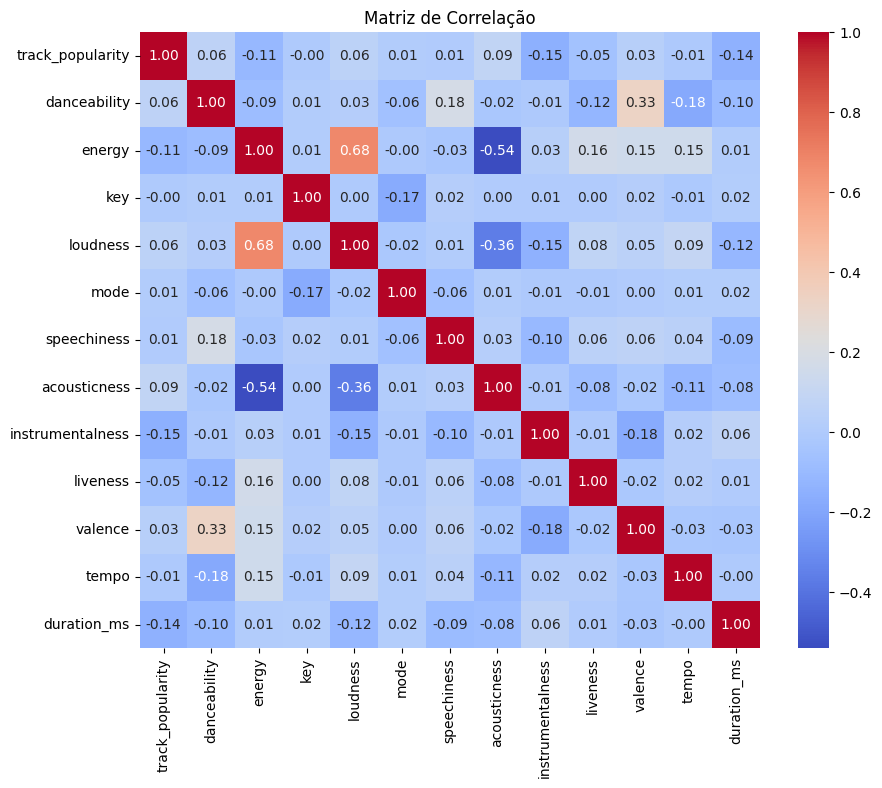

In [13]:
# Exibindo a matriz de correlação em um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [14]:
# Média de popularidade por gênero de playlist
popularity_by_genre = df.groupby('playlist_genre')['track_popularity'].mean().reset_index()
print("\nMédia de popularidade por gênero de playlist:")
print(popularity_by_genre.to_string(index=False))


Média de popularidade por gênero de playlist:
playlist_genre  track_popularity
           edm         34.833526
         latin         47.026576
           pop         47.744870
           r&b         41.223532
           rap         43.215454
          rock         41.728338


In [15]:
# Contagem de faixas por artista
tracks_per_artist = df['track_artist'].value_counts().head(10).reset_index()
tracks_per_artist.columns = ['Artista', 'Contagem de Faixas']
print("\nTop 10 artistas com mais faixas:")
print(tracks_per_artist.to_string(index=False))



Top 10 artistas com mais faixas:
                  Artista  Contagem de Faixas
            Martin Garrix                 161
                    Queen                 136
         The Chainsmokers                 123
             David Guetta                 110
                 Don Omar                 102
                    Drake                 100
Dimitri Vegas & Like Mike                  93
            Calvin Harris                  91
                 Hardwell                  84
                     Kygo                  83


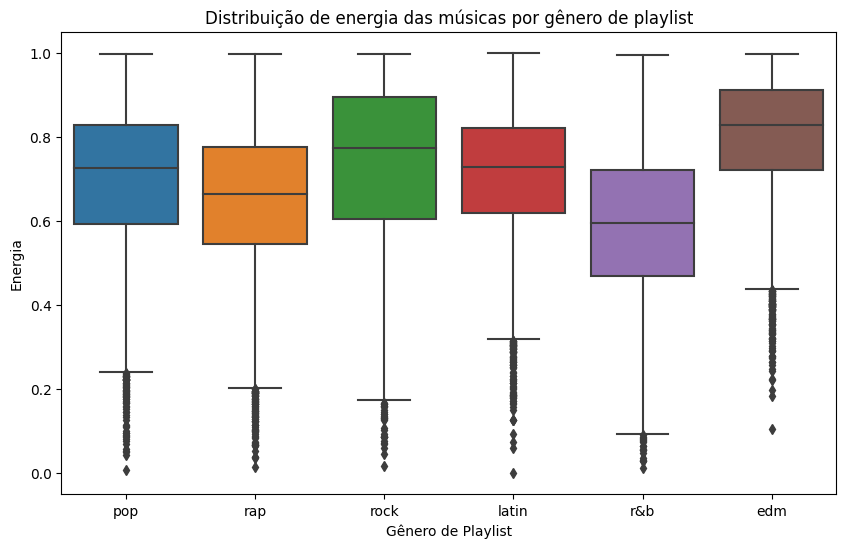

In [16]:
# Distribuição de energia das músicas por gênero de playlist
plt.figure(figsize=(10, 6))
sns.boxplot(x='playlist_genre', y='energy', data=df)
plt.title('Distribuição de energia das músicas por gênero de playlist')
plt.xlabel('Gênero de Playlist')
plt.ylabel('Energia')
plt.show()

In [17]:
# Converter as datas para o formato brasileiro (dd/mm/aaaa)
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Remover linhas com datas inválidas após a conversão
df = df.dropna(subset=['track_album_release_date'])

# Converter as datas para o formato desejado (dd/mm/aaaa)
df['track_album_release_date'] = df['track_album_release_date'].dt.strftime('%d/%m/%Y')

# Ordenar as datas em ordem crescente
df = df.sort_values('track_album_release_date')

# Exibir as primeiras 5 linhas após a modificação das datas
print("Primeiras 5 linhas após a modificação das datas:")
print(df[['track_album_release_date']].head().to_string(index=False))

# Exibir as últimas 5 linhas após a modificação das datas
print("\nÚltimas 5 linhas após a modificação das datas:")
print(df[['track_album_release_date']].tail().to_string(index=False))


Primeiras 5 linhas após a modificação das datas:
track_album_release_date
              01/01/1957
              01/01/1965
              01/01/1966
              01/01/1966
              01/01/1966

Últimas 5 linhas após a modificação das datas:
track_album_release_date
              31/12/2019
              31/12/2019
              31/12/2019
              31/12/2019
              31/12/2019


In [18]:
# Encontrar a primeira e última data (a mais antiga e mais nova)
data_mais_antiga = df['track_album_release_date'].min()
data_mais_nova = df['track_album_release_date'].max()

print(f"Data mais antiga: {data_mais_antiga}")
print(f"Data mais nova: {data_mais_nova}")

Data mais antiga: 01/01/1957
Data mais nova: 31/12/2019


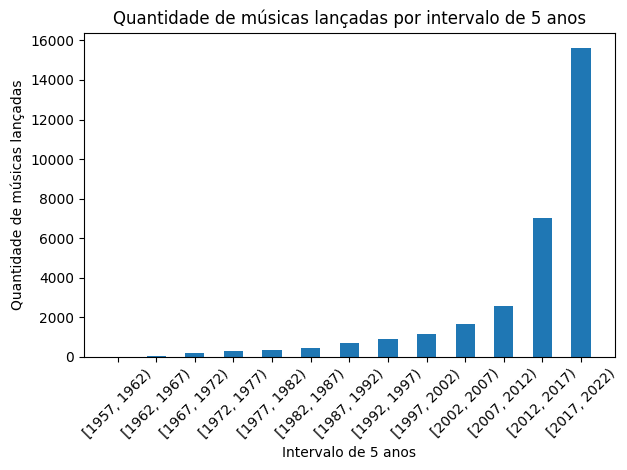

In [19]:
# Criar os intervalos de 5 anos
start_year = df['track_album_release_date'].str[-4:].astype(int).min()
end_year = df['track_album_release_date'].str[-4:].astype(int).max()
bins = list(range(start_year, end_year + 6, 5))

# Criar os intervalos usando pd.cut
df['intervalo'] = pd.cut(df['track_album_release_date'].str[-4:].astype(int), bins=bins, right=False)

# Contar a quantidade de músicas por intervalo de 5 anos
contagem_por_intervalo = df['intervalo'].value_counts().sort_index()

# Criar o histograma
plt.bar(contagem_por_intervalo.index.astype(str), contagem_por_intervalo.values, width=0.5)
plt.xlabel('Intervalo de 5 anos')
plt.ylabel('Quantidade de músicas lançadas')
plt.title('Quantidade de músicas lançadas por intervalo de 5 anos')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o histograma
plt.show()


In [ ]:
# Nome do arquivo que você deseja excluir
nome_arquivo = 'versao_1_spotify_songs.csv'

df.to_csv(nome_arquivo , index=False)
df = pd.read_csv(nome_arquivo ,encoding='utf-8', sep = ',',index_col=0)
df.to_parquet('versao_1_spotify_songs.parquet')

# Verifica se o arquivo existe antes de excluí-lo
if os.path.exists(nome_arquivo):
    # Remove o arquivo
    os.remove(nome_arquivo)
    print(f'O arquivo {nome_arquivo} foi excluído com sucesso.')
else:
    print(f'O arquivo {nome_arquivo} não existe.')